In [1]:
# %%capture
# !pip install -U pandasql
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt
# from pandasql import sqldf 

In [ ]:
from google.colab import drive #Take tables from drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
table = pd.read_csv('/content/drive/MyDrive/Thesis/csvs/NNdata.csv')
table.head()

,Date,IDStation,NameStation,Ammonia,Arsenic,Benzene,Benzo_a_pyrene,Cadmium,CO,Lead,Nikel,NO,NO2,NOx,Ozone,PM10,PM25,Sulfur_dioxide,IDStation.1,reg_Y_nn1_ID,Date.1,IDStation.2,NameStation.1,Wind_speed,Wind_direction,Temperature,Relative_humidity,Global_radiation,Wind_speed_max,Wind_direction_max,Rainfall
0,2018-01-01T00:00:00Z,677,Cremona Via Fatebenefratelli,6.2,NaN,NaN,NaN,NaN,0.508333,NaN,NaN,NaN,36.175000,63.570833,5.225000,NaN,45.0,1.829167,677,677,2018-01-01T00:00:00Z,677,Cremona Via Fatebenefratelli,0.483454,314.0,2.615278,93.738194,21.268056,2.133333,NaN,7.2
1,2018-01-01T00:00:00Z,681,Moggio,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.341667,3.308333,5.075000,66.100000,5.0,4.0,NaN,681,111,2018-01-01T00:00:00Z,111,Cassina Valsassina Moggio,0.300970,65.0,2.095833,74.055556,60.152778,1.939583,144.0,2.4
2,2018-01-01T00:00:00Z,703,Schivenoglia,NaN,NaN,1.0,NaN,NaN,1.159091,NaN,NaN,NaN,25.572727,35.850000,9.281818,44.0,43.0,4.813636,703,671,2018-01-01T00:00:00Z,671,Mantova Tridolino,1.540787,288.0,2.761806,99.475694,14.163194,3.524306,NaN,5.8
3,2018-01-02T00:00:00Z,677,Cremona Via Fatebenefratelli,1.8,NaN,NaN,NaN,NaN,0.375000,NaN,NaN,NaN,35.925000,47.750000,18.441667,32.0,27.0,1.341667,677,677,2018-01-02T00:00:00Z,677,Cremona Via Fatebenefratelli,1.788399,284.0,5.974306,70.609722,72.734028,4.377083,NaN,0.0
4,2018-01-02T00:00:00Z,681,Moggio,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.441667,1.283333,85.891667,3.0,2.0,NaN,681,111,2018-01-02T00:00:00Z,111,Cassina Valsassina Moggio,0.613183,9.0,1.670139,39.194444,68.250000,3.075000,213.0,0.0


# Nuova sezione

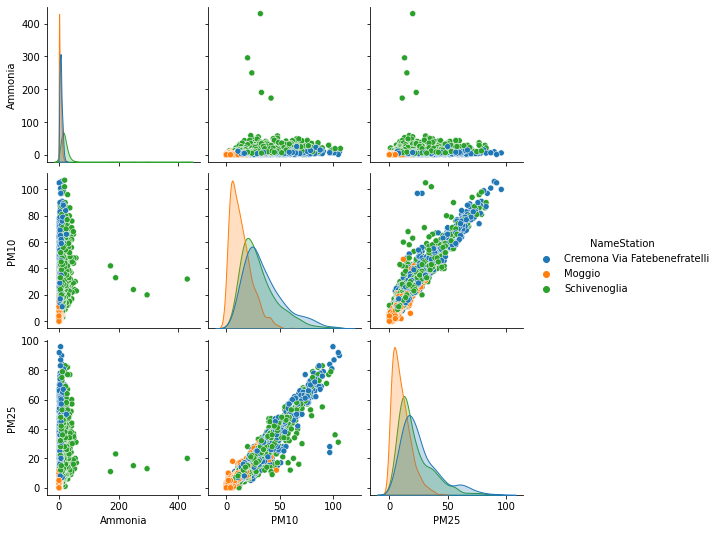

In [ ]:
sns.pairplot(table.loc[:,["NameStation","Ammonia","PM10","PM25"]],hue="NameStation")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

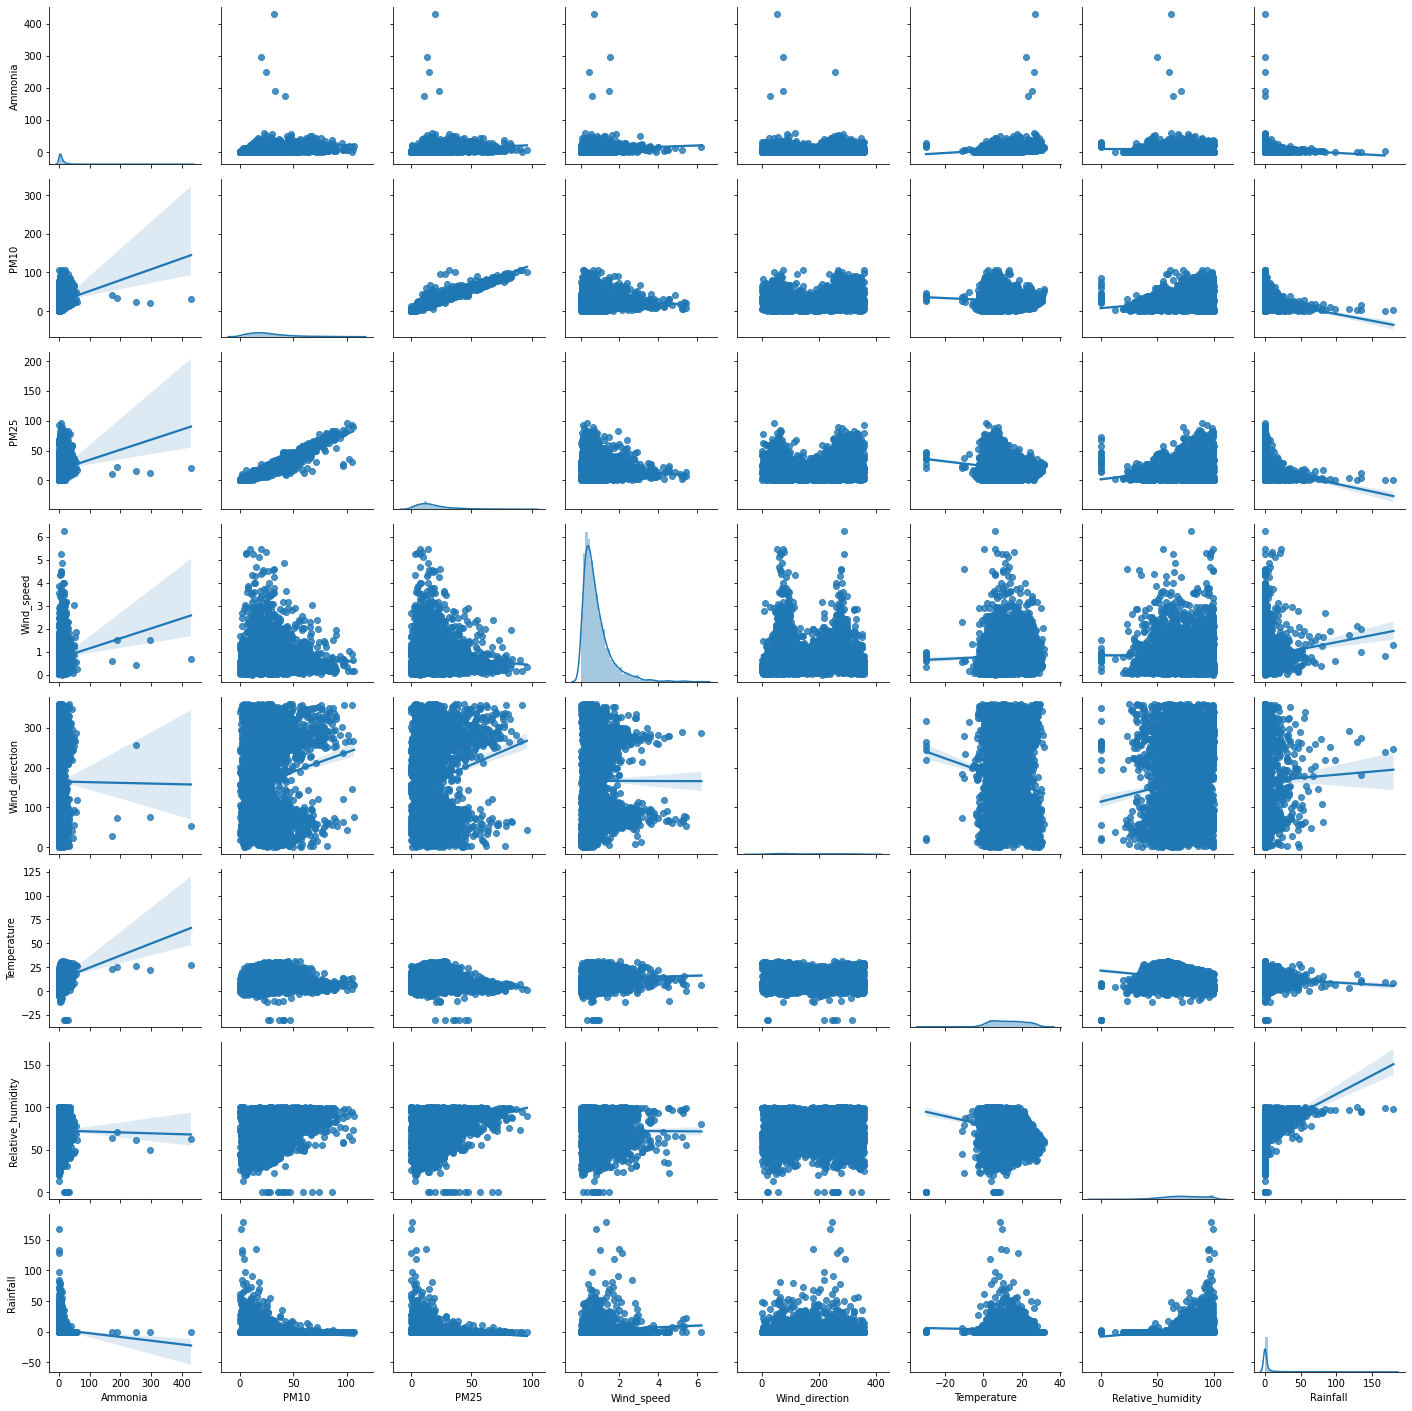

In [ ]:
g = sns.PairGrid(table.loc[:,['NameStation','Ammonia','PM10','PM25','Wind_speed','Wind_direction','Temperature','Relative_humidity','Rainfall']])
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(sns.regplot)

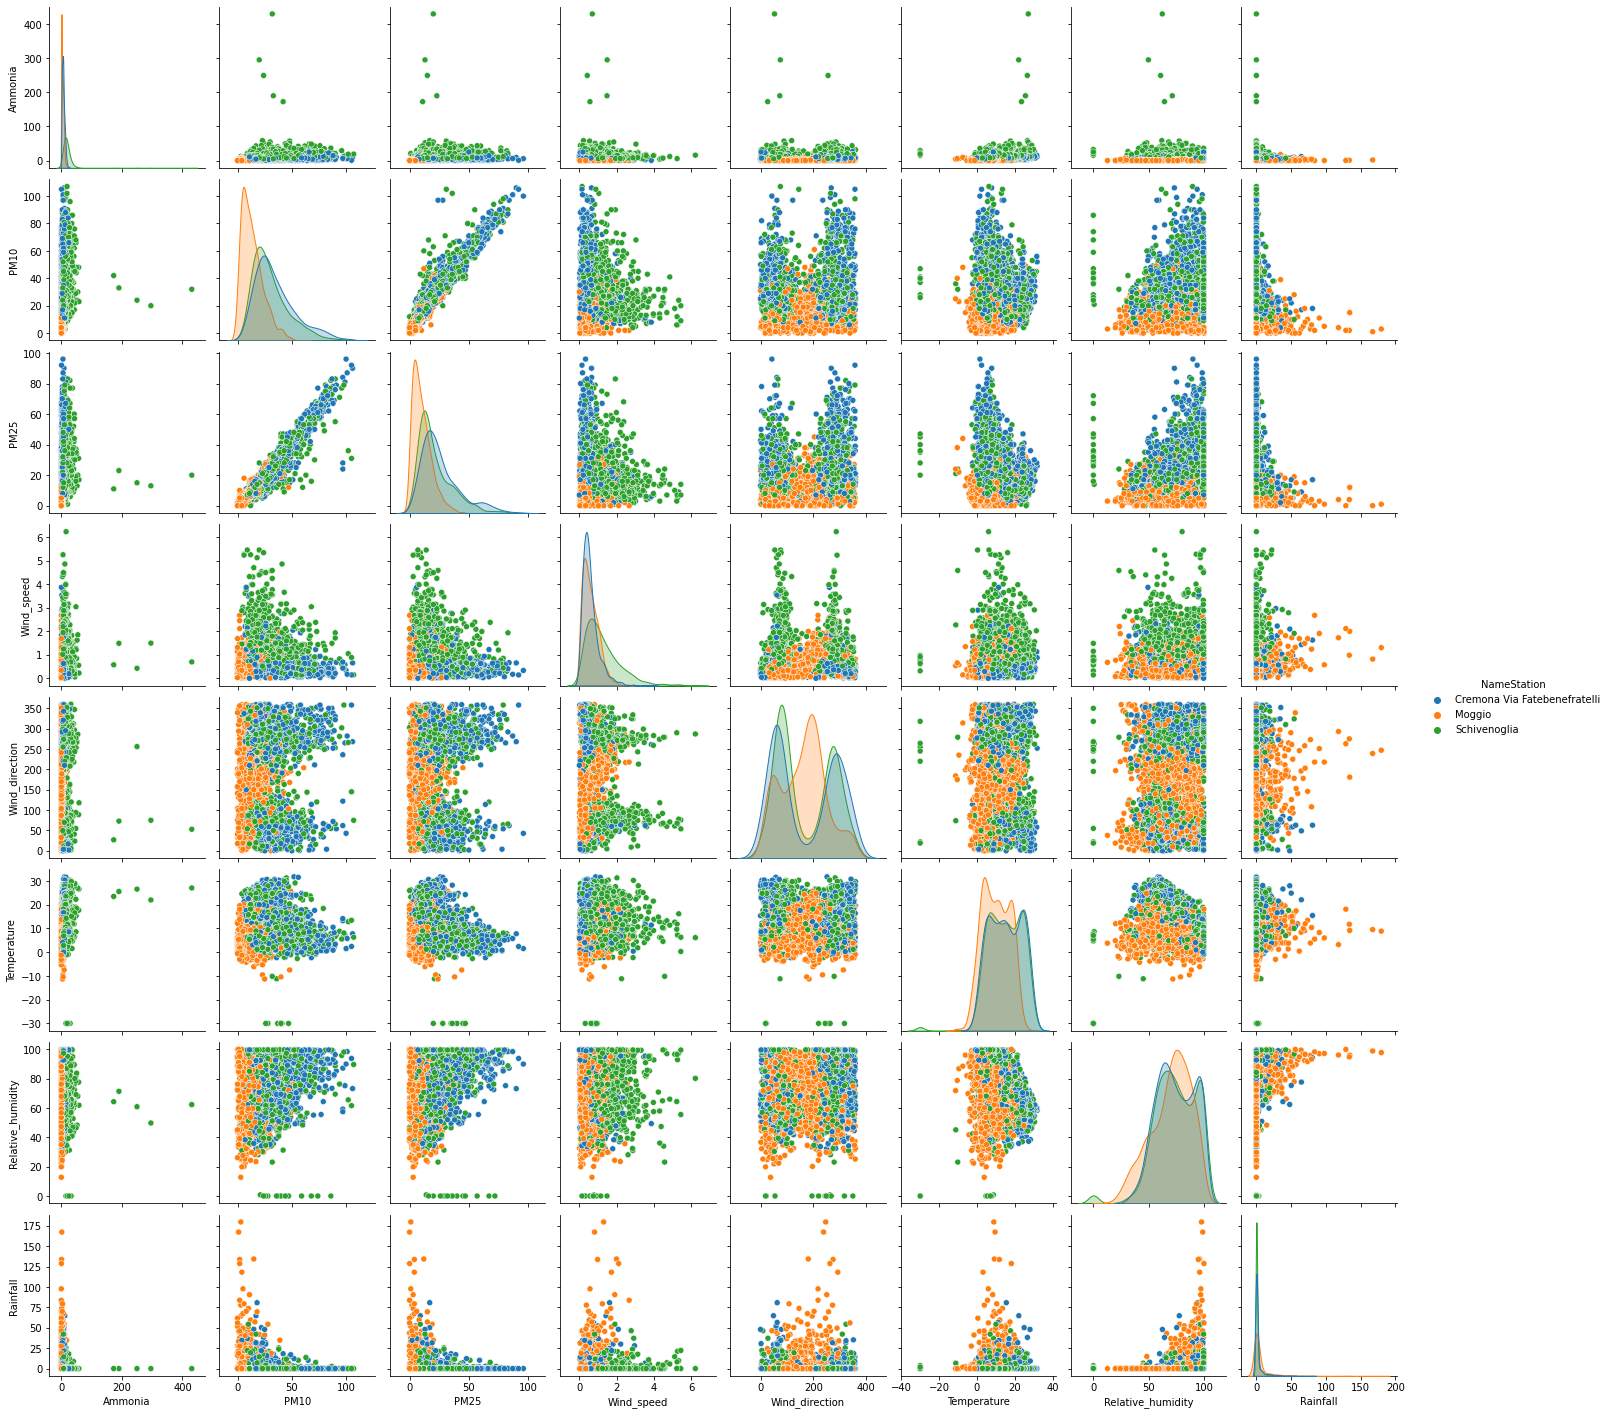

In [ ]:
sns.pairplot(table.loc[:,['NameStation','Ammonia','PM10','PM25','Wind_speed','Wind_direction','Temperature','Relative_humidity','Rainfall']],hue="NameStation")

In [ ]:
# now with rainfall zero values set to NaN
table1r = table.copy()
table1r.loc[table.loc[:,'Rainfall']==0,'Rainfall'] = np.nan
sns.pairplot(table1r.loc[:,['NameStation','Ammonia','PM10','PM2.5','Temperature','Relative_humidity','Global_radiation','Rainfall']],hue="NameStation")

In [ ]:

table2 = table.iloc[2000:np.shape(table)[0],:] #altair can only use up to 5000 rows

interval = alt.selection_interval()

points = alt.Chart(table2).mark_point().encode(
  x='PM10',
  y='Ammonia',
  color=alt.condition(interval, 'NameStation', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(table2).mark_bar().encode(
  x='count()',
  y='NameStation',
  color='NameStation'
).transform_filter(interval)

points & histogram

NameError: ignored

In [ ]:
table1.head()

NameError: ignored

In [ ]:
table2 = table.iloc[2000:np.shape(table)[0],:] #altair can only use up to 5000 rows
table3 = table2.copy()
# remove outliers
table3.loc[table2.loc[:,'Ammonia']>150,'Ammonia'] = np.nan
table3.loc[table2.loc[:,'PM10']>140,'PM10'] = np.nan

In [ ]:

# create plot again
interval = alt.selection_interval()

table4 = table1.iloc[2000:np.shape(table)[0],:]

points = alt.Chart(table4).mark_point().encode(
  x='Temperature',
  y='Ammonia',
  color=alt.condition(interval, 'NameStation', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(table3).mark_bar().encode(
  x='count()',
  y='NameStation',
  color='NameStation'
).transform_filter(interval)

points & histogram

In [ ]:
# bubble chart scatterplot